<a href="https://colab.research.google.com/github/Chandhinirajamahendran/Project/blob/main/Mall_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [ ]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Machine learning model
from sklearn.cluster import KMeans

**Read dataset**

In [ ]:
df = pd.read_csv('Mall_customers_dataset.csv')

**Dataset Information**

In [ ]:
df.shape

(5000, 5)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,18,59,12
1,2,Male,29,103,86
2,3,Female,59,143,43
3,4,Male,62,139,16
4,5,Male,19,104,24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              5000 non-null   int64 
 1   Gender                  5000 non-null   object
 2   Age                     5000 non-null   int64 
 3   Annual Income (k$)      5000 non-null   int64 
 4   Spending Score (1-100)  5000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 195.4+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,43.958600,81.945400,50.143400
std,1443.520003,15.384805,39.577363,28.939156
min,1.000000,18.000000,15.000000,1.000000
25%,1250.750000,30.000000,47.000000,25.000000
50%,2500.500000,44.000000,82.000000,49.000000
75%,3750.250000,57.000000,116.000000,75.000000
max,5000.000000,70.000000,150.000000,100.000000


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


 **Exploratory Data Analysis**

 Distributions of numeric features

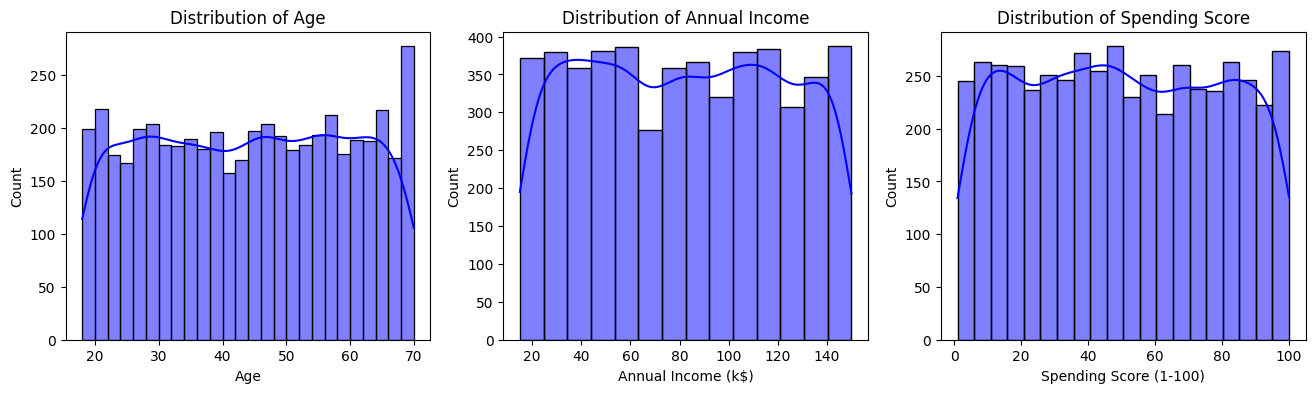

In [ ]:
# Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(16,4))

# Plot 1: Age distribution
sns.histplot(df['Age'], kde=True, color='b', ax=axes[0], bins=26)
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Plot 2: Annual Income distribution
sns.histplot(df['Annual Income (k$)'], kde=True, color='b', ax=axes[1], bins=14)
axes[1].set_title('Distribution of Annual Income')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Count')

# Plot 3: Spending Score distribution
sns.histplot(df['Spending Score (1-100)'], kde=True, color='b', ax=axes[2], bins=20)
axes[2].set_title('Distribution of Spending Score')
axes[2].set_xlabel('Spending Score (1-100)')
axes[2].set_ylabel('Count')

# Show the plots
plt.show()

Distributions of categorial features

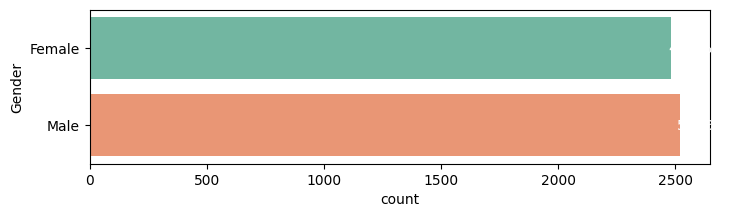

In [ ]:
gender_counts = df['Gender'].value_counts() # Returns a map {gender: count}

plt.figure(1 , figsize = (8 , 2))
sns.countplot(y = 'Gender', hue='Gender', data = df, palette='Set2')

for i in df['Gender'].unique():
    count = gender_counts[i]
    percentage = (count / df.shape[0]) * 100
    plt.text(count - 12, i, f'{percentage:.1f}%', va='center', color='w')

plt.grid(False)
plt.show()

Distributions of numeric features wrt categorial features

<Figure size 800x600 with 0 Axes>

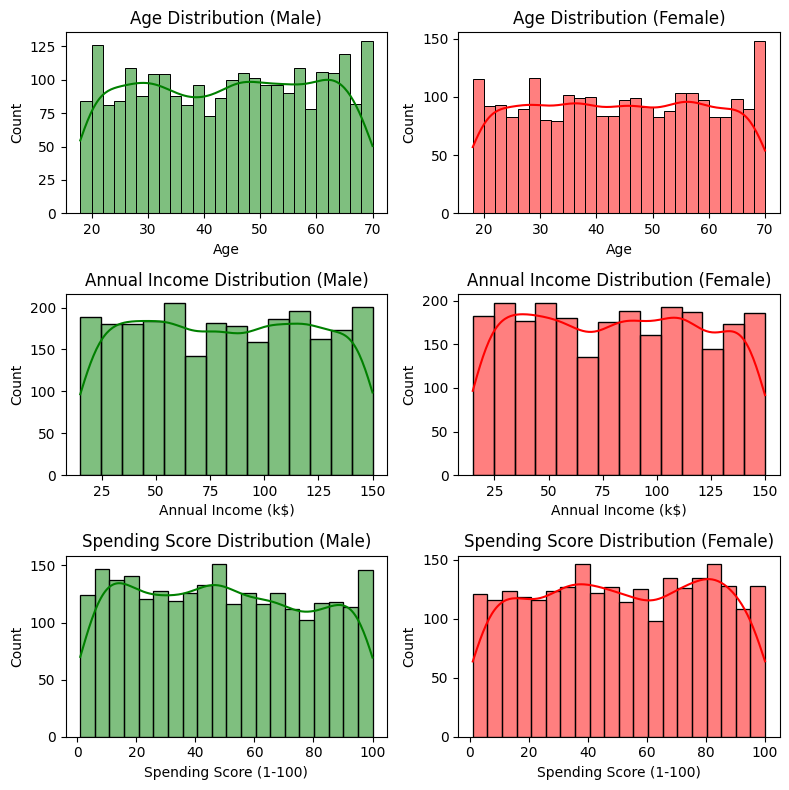

In [ ]:
# Set the overall figure size
plt.figure(figsize=(8, 6))

# Create subplots: 3 rows, 2 columns (for 6 plots)
fig, axes = plt.subplots(3, 2, figsize=(8, 8))

# Plot 1: Age distribution for Male
sns.histplot(df[df['Gender'] == 'Male']['Age'], kde=True, color='g', ax=axes[0, 0], bins=26)
axes[0, 0].set_title('Age Distribution (Male)')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# Plot 2: Age distribution for Female
sns.histplot(df[df['Gender'] == 'Female']['Age'], kde=True, color='r', ax=axes[0, 1], bins=26)
axes[0, 1].set_title('Age Distribution (Female)')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Count')

# Plot 3: Annual Income distribution for Male
sns.histplot(df[df['Gender'] == 'Male']['Annual Income (k$)'], kde=True, color='g', ax=axes[1, 0], bins=14)
axes[1, 0].set_title('Annual Income Distribution (Male)')
axes[1, 0].set_xlabel('Annual Income (k$)')
axes[1, 0].set_ylabel('Count')
# Plot 4: Annual Income distribution for Female
sns.histplot(df[df['Gender'] == 'Female']['Annual Income (k$)'], kde=True, color='r', ax=axes[1, 1], bins=14)
axes[1, 1].set_title('Annual Income Distribution (Female)')
axes[1, 1].set_xlabel('Annual Income (k$)')
axes[1, 1].set_ylabel('Count')

# Plot 5: Spending Score distribution for Male
sns.histplot(df[df['Gender'] == 'Male']['Spending Score (1-100)'], kde=True, color='g', ax=axes[2, 0], bins=20)
axes[2, 0].set_title('Spending Score Distribution (Male)')
axes[2, 0].set_xlabel('Spending Score (1-100)')
axes[2, 0].set_ylabel('Count')

# Plot 6: Spending Score distribution for Female
sns.histplot(df[df['Gender'] == 'Female']['Spending Score (1-100)'], kde=True, color='r', ax=axes[2, 1], bins=20)
axes[2, 1].set_title('Spending Score Distribution (Female)')
axes[2, 1].set_xlabel('Spending Score (1-100)')
axes[2, 1].set_ylabel('Count')

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

<Figure size 1500x800 with 0 Axes>

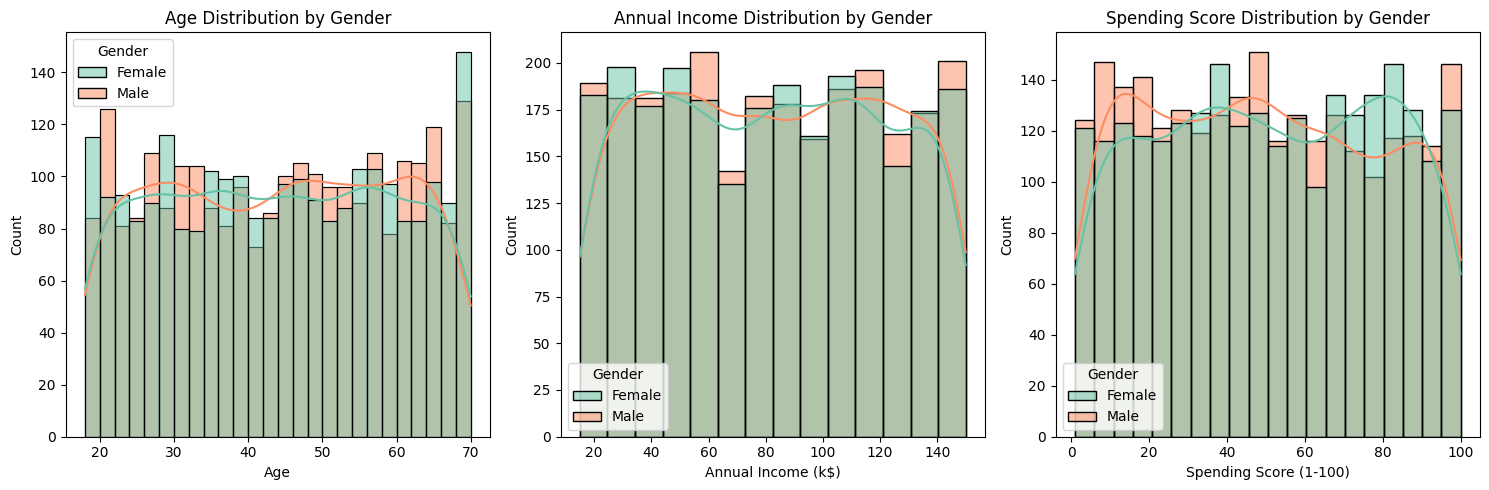

In [ ]:
# Set the overall figure size
plt.figure(figsize=(15, 8))

# Create subplots: 1 row, 3 columns for 3 plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Age distribution for both genders
sns.histplot(df, x='Age', hue='Gender', kde=True, ax=axes[0], bins=26, palette='Set2')
axes[0].set_title('Age Distribution by Gender')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Plot 2: Annual Income distribution for both genders
sns.histplot(df, x='Annual Income (k$)', hue='Gender', kde=True, ax=axes[1], bins=14, palette='Set2')
axes[1].set_title('Annual Income Distribution by Gender')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Count')

# Plot 3: Spending Score distribution for both genders
sns.histplot(df, x='Spending Score (1-100)', hue='Gender', kde=True, ax=axes[2], bins=20, palette='Set2')
axes[2].set_title('Spending Score Distribution by Gender')
axes[2].set_xlabel('Spending Score (1-100)')
axes[2].set_ylabel('Count')

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

**Relationships between features**

 Numerical vs Numerical with respect to Gender

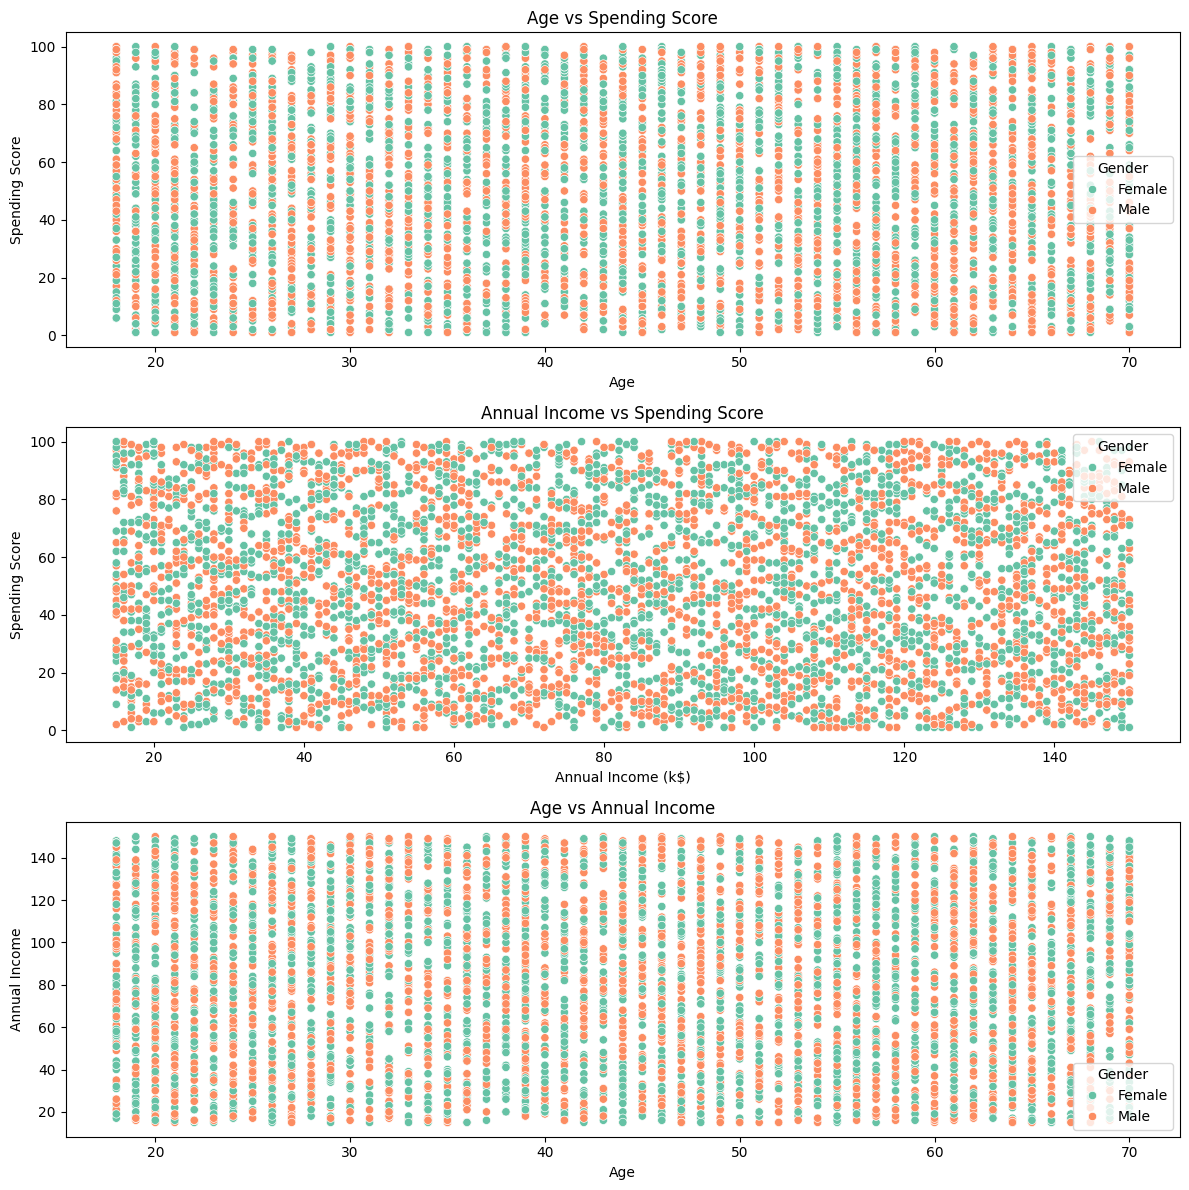

In [ ]:
# Set up the figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 12))  # 3 rows, 1 column, adjusting figure size for better view

# Scatter plot for Age vs Spending Score
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Age vs Spending Score')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Spending Score')

# Scatter plot for Annual Income vs Spending Score
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Annual Income vs Spending Score')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Spending Score')

# Scatter plot for Age vs Annual Income
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=df, ax=axes[2], palette='Set2')
axes[2].set_title('Age vs Annual Income')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Annual Income')

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

**K-Means Clustering**

Choose the number of clusters using the elbow method

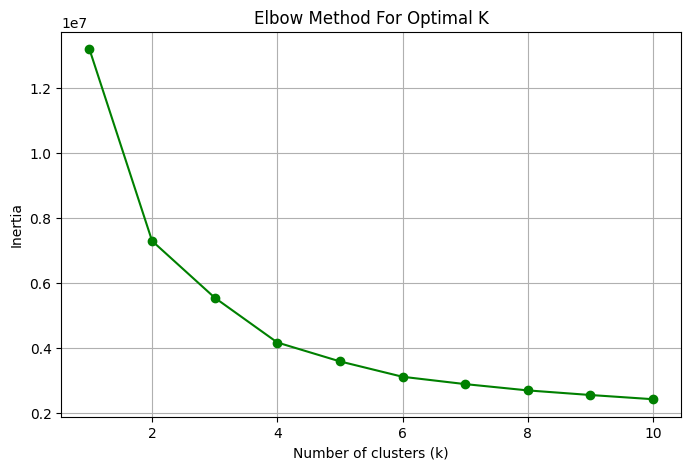

In [ ]:
# Define a range of potential cluster numbers
k_values = range(1, 11)
inertia_values = []

# Calculate inertia for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=00)
    kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values against k
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', color='g')
plt.title('Elbow Method For Optimal K', color='black')
plt.xlabel('Number of clusters (k)', color='black')
plt.ylabel('Inertia', color='black')
plt.grid(True)
plt.show()

Clustering at k=5

In [ ]:
df_k5 = df.copy(deep=True)

# Apply KMeans clustering with K=5
kmeans = KMeans(n_clusters=5, random_state=00)
df_k5['Cluster'] = kmeans.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

df_k5.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
3332,3333,Female,23,62,40,2
3871,3872,Male,67,108,26,1
2955,2956,Male,46,58,29,2
4671,4672,Female,62,138,80,3
3177,3178,Male,24,34,80,4


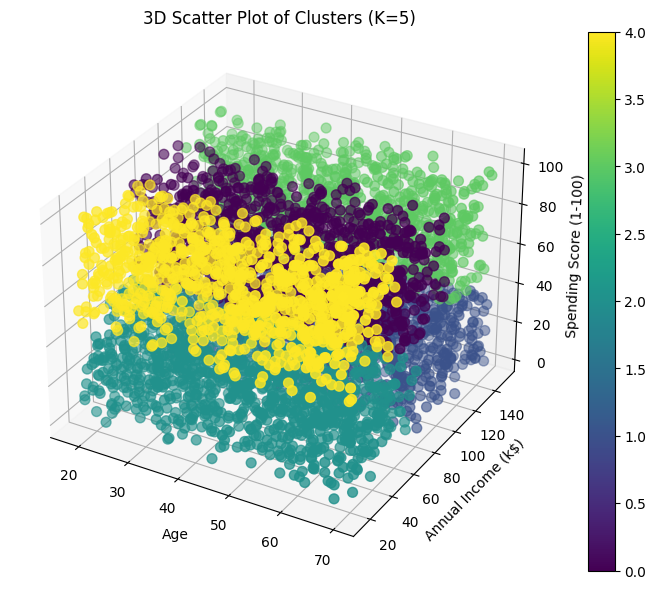

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot to visualize the clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
scatter = ax.scatter(
    df_k5['Age'],
    df_k5['Annual Income (k$)'],
    df_k5['Spending Score (1-100)'],
    c=df_k5['Cluster'],
    cmap='viridis',
    s=50  # Size of points
)

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Scatter Plot of Clusters (K=5)')

# Add colorbar for clusters
plt.colorbar(scatter)
plt.show()

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,18,59,12
1,2,1,29,103,86
2,3,0,59,143,43
3,4,1,62,139,16
4,5,1,19,104,24


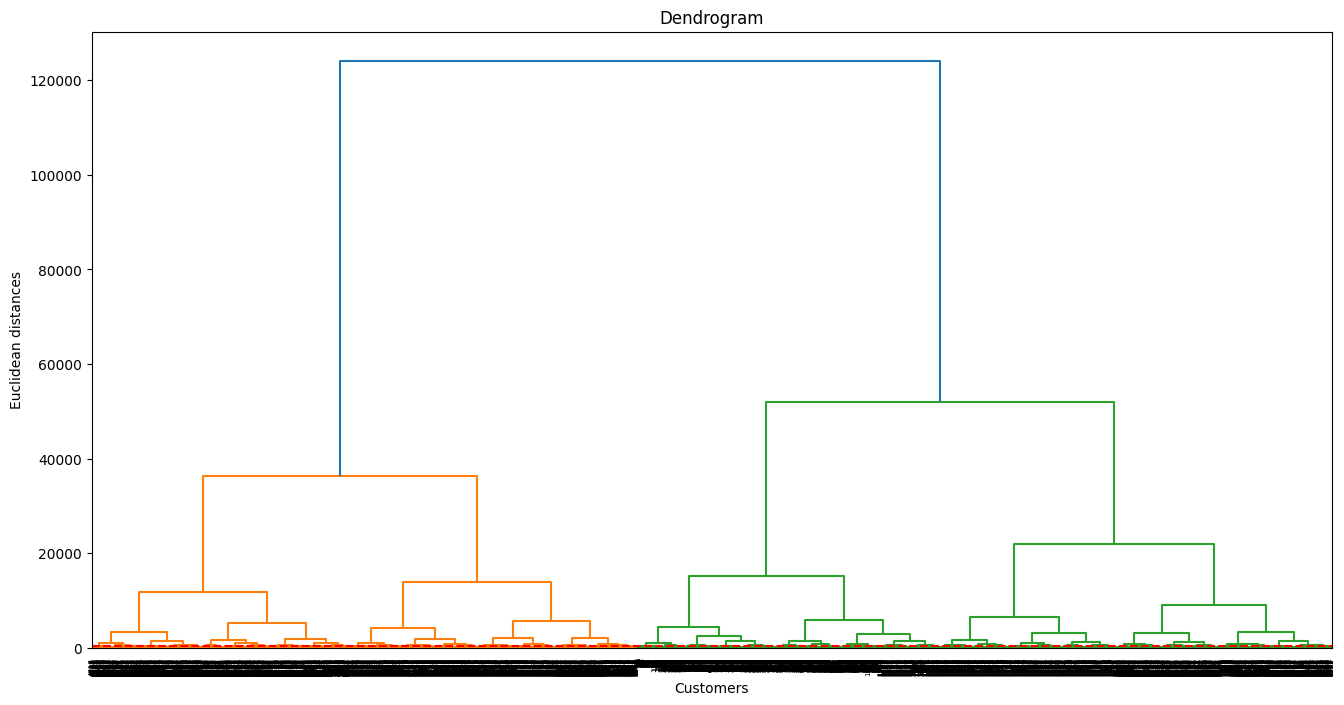

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(df, method  = "ward"))
plt.axhline(y=300, color='r', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters = 5, linkage ='average')

y_hc = hc.fit_predict(df)
y_hc

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
df['cluster'] = pd.DataFrame(y_hc)

In [ ]:
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['cluster'],
        size= 10,
        line=dict(
            color= df['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters using Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)

In [ ]:
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

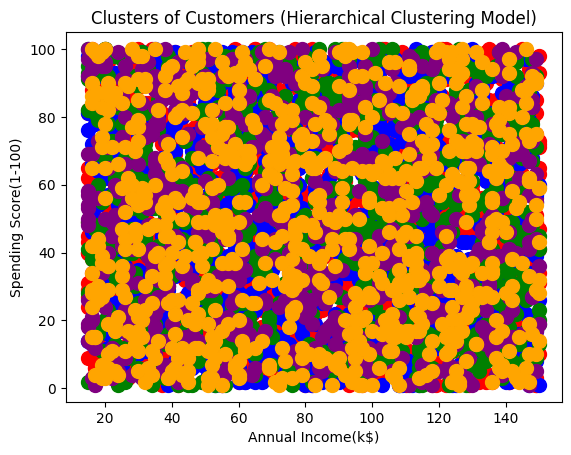

In [ ]:
X = df.iloc[:, [3,4]].values
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='purple', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='orange', label ='Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()